In [30]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

Нужно придумать небольшую базу данных и написать к ней запросы.



В базе должно быть минимум 4 таблицы и хотя бы две связи вида one-to-many или many-to-many. Можно решить как при помощи pandas, так и при помощи SQL.



Запросы должны быть осмысленными и должны решать какую-то задачу.

In [31]:
sql = sqlite3.connect(r"C:\Users\roman\ds_course\data\players.db")

In [57]:
np.random.seed(42)

n_users = 200

users_df = pd.DataFrame({
    "username": [f"user_{i:04d}" for i in range(1, n_users + 1)],
    "email": [f"user_{i:04d}@example.com" for i in range(1, n_users + 1)],
    "registration_date": pd.to_datetime("2025-01-01") +
        pd.to_timedelta(np.random.randint(0, 345, n_users), unit="D")
})

users_df.to_sql("users", sql, index_label="user_id", if_exists="replace")
pd.read_sql("SELECT * FROM users", sql)

,user_id,username,email,registration_date
0,0,user_0001,user_0001@example.com,2025-04-13 00:00:00
1,1,user_0002,user_0002@example.com,2025-09-28 00:00:00
2,2,user_0003,user_0003@example.com,2025-04-17 00:00:00
3,3,user_0004,user_0004@example.com,2025-03-13 00:00:00
4,4,user_0005,user_0005@example.com,2025-07-08 00:00:00
...,...,...,...,...
195,195,user_0196,user_0196@example.com,2025-05-10 00:00:00
196,196,user_0197,user_0197@example.com,2025-08-08 00:00:00
197,197,user_0198,user_0198@example.com,2025-02-23 00:00:00
198,198,user_0199,user_0199@example.com,2025-12-09 00:00:00


In [58]:
n_games = 80

genres = ["RPG", "Action", "Indie", "Strategy", "Simulation"]

games_df = pd.DataFrame({
    "title": [f"Game_{i:03d}" for i in range(1, n_games + 1)],
    "release_date": pd.to_datetime("2010-01-01") +
        pd.to_timedelta(np.random.randint(0, 5000, n_games), unit="D"),
    "price": np.round(np.random.choice(
        [4.99, 9.99, 14.99, 19.99, 29.99, 39.99, 59.99],
        n_games
    ), 2)
})

games_df.to_sql("games", sql, index_label="game_id", if_exists="replace")
pd.read_sql("SELECT * FROM games", sql)

,game_id,title,release_date,price
0,0,Game_001,2019-07-07 00:00:00,4.99
1,1,Game_002,2014-09-04 00:00:00,19.99
2,2,Game_003,2017-08-09 00:00:00,4.99
3,3,Game_004,2014-09-30 00:00:00,19.99
4,4,Game_005,2023-07-03 00:00:00,4.99
...,...,...,...,...
75,75,Game_076,2020-05-05 00:00:00,39.99
76,76,Game_077,2017-11-09 00:00:00,9.99
77,77,Game_078,2018-11-09 00:00:00,59.99
78,78,Game_079,2020-05-19 00:00:00,39.99


In [59]:
n_purchases = 1800

purchases_df = pd.DataFrame({
    "user_id": np.random.randint(1, n_users + 1, n_purchases),
    "game_id": np.random.randint(1, n_games + 1, n_purchases),
    "purchase_date": (
        pd.to_datetime("2025-01-01")
        + pd.to_timedelta(
            np.random.randint(0, 345, n_purchases),
            unit="D"
        )
    )
})

game_prices = games_df["price"]

purchases_df["price_paid"] = (
    purchases_df["game_id"]
        .map(game_prices)
        .mul(
            np.random.choice(
                [0.6, 0.8, 1.0],
                size=n_purchases,
                p=[0.2, 0.3, 0.5]
            )
        )
        .round(2)
)

purchases_df.to_sql(
    "purchases",
    sql,
    index_label="purchase_id",
    if_exists="replace"
)

pd.read_sql("SELECT * FROM purchases", sql)

,purchase_id,user_id,game_id,purchase_date,price_paid
0,0,194,20,2025-04-24 00:00:00,31.99
1,1,127,78,2025-09-14 00:00:00,23.99
2,2,155,2,2025-02-27 00:00:00,2.99
3,3,130,73,2025-06-03 00:00:00,7.99
4,4,17,37,2025-04-26 00:00:00,14.99
...,...,...,...,...,...
1795,1795,156,17,2025-01-20 00:00:00,39.99
1796,1796,111,18,2025-07-30 00:00:00,39.99
1797,1797,134,45,2025-08-28 00:00:00,23.99
1798,1798,108,53,2025-02-08 00:00:00,17.99


In [60]:
n_reviews = 850

comments_pool = [
    "Отличная игра",
    "Можно было лучше",
    "Очень затягивает",
    "Не стоит своих денег",
    "Шедевр",
    "Слабая оптимизация",
    "Куплю продолжение",
    "Прошел на одном дыхании",
    "Скучно",
    "Топ за свои деньги"
]

reviews_df = pd.DataFrame({
    "user_id": np.random.randint(1, n_users + 1, n_reviews),
    "game_id": np.random.randint(1, n_games + 1, n_reviews),
    "rating": np.random.randint(1, 11, n_reviews),
    "comment": np.random.choice(comments_pool, n_reviews),
    "review_date": pd.to_datetime("2025-01-01") +
        pd.to_timedelta(np.random.randint(0, 345, n_reviews), unit="D")
})

reviews_df.to_sql("reviews", sql, index_label="review_id", if_exists="replace")
pd.read_sql("SELECT * FROM reviews", sql)

,review_id,user_id,game_id,rating,comment,review_date
0,0,124,26,1,Куплю продолжение,2025-10-09 00:00:00
1,1,53,55,8,Прошел на одном дыхании,2025-06-30 00:00:00
2,2,159,39,2,Слабая оптимизация,2025-10-09 00:00:00
3,3,69,33,1,Очень затягивает,2025-10-06 00:00:00
4,4,104,14,7,Отличная игра,2025-01-30 00:00:00
...,...,...,...,...,...,...
845,845,164,13,1,Отличная игра,2025-12-05 00:00:00
846,846,6,11,3,Скучно,2025-11-22 00:00:00
847,847,149,24,8,Отличная игра,2025-06-17 00:00:00
848,848,118,73,9,Слабая оптимизация,2025-04-19 00:00:00


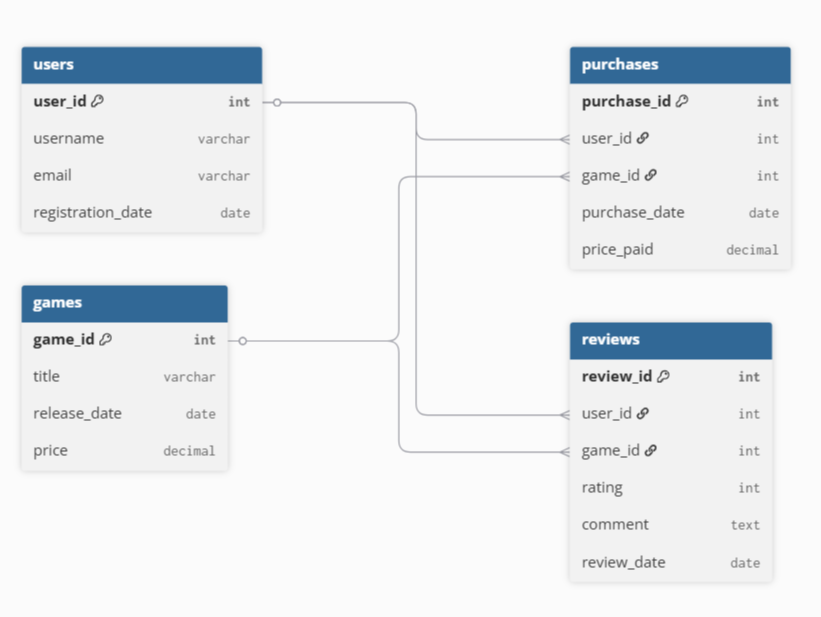

### Уровень 1

Выгрузить данные и отфильтровать их по какому-то значению.

🟢 УРОВЕНЬ 1 — фильтрация и выгрузка

1.1
Выгрузи всех пользователей, которые зарегистрировались после 1 марта 2025.

1.2
Выгрузи игры:

с ценой выше 30

отсортируй по цене по убыванию

1.3
Выгрузи все покупки, совершённые:

в феврале 2025

где price_paid < price (покупка со скидкой)

1.4
Выгрузи отзывы:

с рейтингом 8 и выше

содержащие в комментарии слово топ или шедевр

In [61]:
pd.read_sql('select * from users where registration_date > "2025-03-01"', sql)

,user_id,username,email,registration_date
0,0,user_0001,user_0001@example.com,2025-04-13 00:00:00
1,1,user_0002,user_0002@example.com,2025-09-28 00:00:00
2,2,user_0003,user_0003@example.com,2025-04-17 00:00:00
3,3,user_0004,user_0004@example.com,2025-03-13 00:00:00
4,4,user_0005,user_0005@example.com,2025-07-08 00:00:00
...,...,...,...,...
159,193,user_0194,user_0194@example.com,2025-04-23 00:00:00
160,195,user_0196,user_0196@example.com,2025-05-10 00:00:00
161,196,user_0197,user_0197@example.com,2025-08-08 00:00:00
162,198,user_0199,user_0199@example.com,2025-12-09 00:00:00


In [62]:
pd.read_sql('select * from games where price > 30 order by price desc', sql)

,game_id,title,release_date,price
0,8,Game_009,2021-07-20 00:00:00,59.99
1,16,Game_017,2019-10-23 00:00:00,59.99
2,32,Game_033,2015-01-18 00:00:00,59.99
3,57,Game_058,2022-04-27 00:00:00,59.99
4,62,Game_063,2022-10-27 00:00:00,59.99
5,65,Game_066,2021-07-01 00:00:00,59.99
6,71,Game_072,2016-01-10 00:00:00,59.99
7,77,Game_078,2018-11-09 00:00:00,59.99
8,79,Game_080,2012-08-14 00:00:00,59.99
9,5,Game_006,2019-08-12 00:00:00,39.99


In [63]:
pd.read_sql('''
select p.*
from purchases p
left join games g on p.game_id = g.game_id
where
    p.purchase_date >= "2025-02-1"
    and p.purchase_date < "2025-03-1"
    and p.price_paid < g.price
''',
sql)

,purchase_id,user_id,game_id,purchase_date,price_paid
0,2,155,2,2025-02-27 00:00:00,2.99
1,15,153,78,2025-03-09 00:00:00,23.99
2,43,58,55,2025-02-15 00:00:00,23.99
3,69,52,73,2025-02-23 00:00:00,5.99
4,118,69,48,2025-02-17 00:00:00,31.99
...,...,...,...,...,...
67,1706,96,54,2025-02-13 00:00:00,3.99
68,1716,39,6,2025-02-12 00:00:00,17.99
69,1743,60,76,2025-02-23 00:00:00,5.99
70,1750,145,4,2025-02-15 00:00:00,2.99


In [3]:
import re

df = pd.read_sql("SELECT * FROM reviews WHERE rating >= 8", sql)

pattern = re.compile(r'топ|шедевр', re.IGNORECASE)
df_filtered = df[df['comment'].str.contains(pattern)]

df_filtered

,review_id,user_id,game_id,rating,comment,review_date
9,24,36,78,8,Шедевр,2025-01-29 00:00:00
16,47,145,23,10,Топ за свои деньги,2025-08-25 00:00:00
19,54,158,50,10,Топ за свои деньги,2025-04-21 00:00:00
33,96,171,67,9,Шедевр,2025-03-28 00:00:00
36,111,198,26,8,Топ за свои деньги,2025-03-15 00:00:00
38,113,55,38,9,Топ за свои деньги,2025-06-05 00:00:00
53,167,159,47,9,Топ за свои деньги,2025-12-10 00:00:00
55,170,165,32,8,Шедевр,2025-10-13 00:00:00
67,227,9,73,10,Топ за свои деньги,2025-08-23 00:00:00
71,240,6,41,10,Топ за свои деньги,2025-07-11 00:00:00


### Уровень 2

Написать запрос на объединение двух или более таблиц, также в запросе должна быть фильтрация

🟡 УРОВЕНЬ 2 — JOIN + фильтрация

2.1
Для каждой покупки выведи:

username

title игры

дату покупки

цену покупки

Оставь только покупки пользователей, зарегистрированных раньше даты покупки.

2.2
Найди всех пользователей, которые:

купили игру

оставили на неё отзыв

поставили рейтинг ниже 6

Выведи: username, title, rating.

2.3
Выведи список игр:

которые ни разу не покупали

отсортируй по дате релиза

2.4
Для каждой игры выведи:

количество покупок

средний рейтинг

Оставь только игры:

с минимум 5 покупками

средний рейтинг не ниже 8

In [6]:
pd.read_sql(
'''
select
    username, title, purchase_date, price_paid
from users u
left join purchases p on u.user_id = p.user_id
left join games g on p.game_id = g.game_id
where u.registration_date < p.purchase_date
''',
sql)

,username,title,purchase_date,price_paid
0,user_0195,Game_021,2025-04-24 00:00:00,31.99
1,user_0128,Game_079,2025-09-14 00:00:00,23.99
2,user_0105,Game_021,2025-12-09 00:00:00,39.99
3,user_0162,Game_027,2025-09-23 00:00:00,11.99
4,user_0138,Game_030,2025-11-11 00:00:00,31.99
...,...,...,...,...
898,user_0121,Game_021,2025-10-26 00:00:00,39.99
899,user_0057,Game_079,2025-05-17 00:00:00,39.99
900,user_0135,Game_046,2025-08-28 00:00:00,23.99
901,user_0109,Game_054,2025-02-08 00:00:00,17.99


In [10]:
pd.read_sql(
'''
select username, title, rating
from users u
left join reviews r on u.user_id = r.user_id
left join games g on r.game_id = g.game_id
where rating < 6
''',
sql)

,username,title,rating
0,user_0125,Game_027,1
1,user_0160,Game_040,2
2,user_0070,Game_034,1
3,user_0017,Game_017,3
4,user_0090,Game_020,2
...,...,...,...
426,user_0154,Game_058,1
427,user_0003,Game_018,3
428,user_0087,Game_072,3
429,user_0165,Game_014,1


In [37]:
pd.read_sql(
'''
select g.*
from games g
left join purchases p on g.game_id = p.game_id
where p.game_id is null
order by release_date
''',
sql)

,game_id,title,release_date,price
0,0,Game_001,2019-07-07 00:00:00,4.99


In [3]:
pd.read_sql(
'''
select p.game_id, count(p.purchase_id) purchases_amount, avg(r.rating) average_rating
from purchases p
left join reviews r on p.user_id = r.user_id
and p.game_id = r.game_id
group by p.game_id
having count(p.purchase_id) >= 5 and avg(r.rating) >= 8
''',
sql)

,game_id,purchases_amount,average_rating
0,3,23,8.000000
1,8,34,10.000000
2,9,21,9.000000
3,11,23,9.333333
4,12,23,8.000000
5,13,32,10.000000
6,22,20,8.000000
7,28,29,9.000000
8,37,22,10.000000
9,38,21,9.000000


### Уровень 3

Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. Построить графики и сделать выводы.

🔴 УРОВЕНЬ 3 — аналитика + выводы
3.1 Анализ выручки и рейтингов

Для каждой игры посчитай:

общее количество покупок

суммарную выручку

средний рейтинг

количество отзывов

Задания:

отсечь игры с < 5 покупок

построить scatter plot:
X = средний рейтинг, Y = выручка

сделать вывод:
есть ли зависимость рейтинга от продаж

3.2 Поведение пользователей (LTV-подобный анализ)

Для каждого пользователя:

количество покупок

суммарные траты

средний рейтинг, который он ставит

Задания:

разбить пользователей на группы по тратам (квантили)

сравнить средний рейтинг между группами

построить boxplot

3.3 Временная аналитика

По месяцам покупки:

количество покупок

суммарная выручка

средняя цена покупки

Задания:

построить линейные графики

проверить, растёт ли средний чек со временем

сделать краткий вывод (2–3 предложения)

3.4 Retention / Engagement (усложнённое)

Для каждого пользователя:

дата первой покупки

количество уникальных дней с покупками

наличие отзывов (0/1)

Задания:

проверить, чаще ли пишут отзывы пользователи с повторными покупками

оформить вывод в виде таблицы + графика

#### 3.1 Анализ выручки и рейтингов

Для каждой игры посчитай:

общее количество покупок

суммарную выручку

средний рейтинг

количество отзывов

Задания:

отсечь игры с < 5 покупок

построить scatter plot: X = средний рейтинг, Y = выручка

сделать вывод: есть ли зависимость рейтинга от продаж

In [4]:
df = pd.read_sql('''
select
    g.title, g.game_id, p.purchases_cnt, p.revenue_per_game, round(r.avg_rating, 2) as avg_rating, r.reviews_cnt
from
    games g
    inner join
        (select game_id, count(purchase_id) as purchases_cnt, sum(price_paid) as revenue_per_game
        from purchases
        group by game_id) p
        on g.game_id = p.game_id
    left join
        (select game_id, avg(rating) as avg_rating, count(review_id) as reviews_cnt
        from reviews
        group by game_id) r
        on g.game_id = r.game_id   
    where p.purchases_cnt >= 5
''',
sql)
df

,title,game_id,purchases_cnt,revenue_per_game,avg_rating,reviews_cnt
0,Game_002,1,18,339.82,6.08,12
1,Game_003,2,22,91.78,4.90,10
2,Game_004,3,23,411.77,5.50,10
3,Game_005,4,25,109.75,5.38,8
4,Game_006,5,19,695.81,5.00,7
...,...,...,...,...,...,...
74,Game_076,75,27,871.73,5.79,14
75,Game_077,76,18,141.82,5.21,14
76,Game_078,77,18,875.82,5.47,15
77,Game_079,78,22,711.78,7.78,9


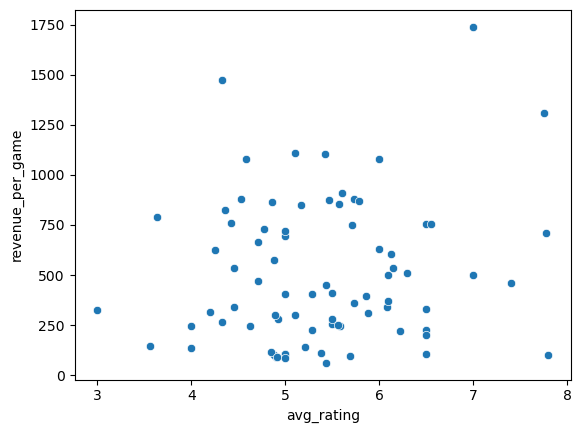

In [8]:
sns.scatterplot(data=df, x='avg_rating', y='revenue_per_game')

plt.show()

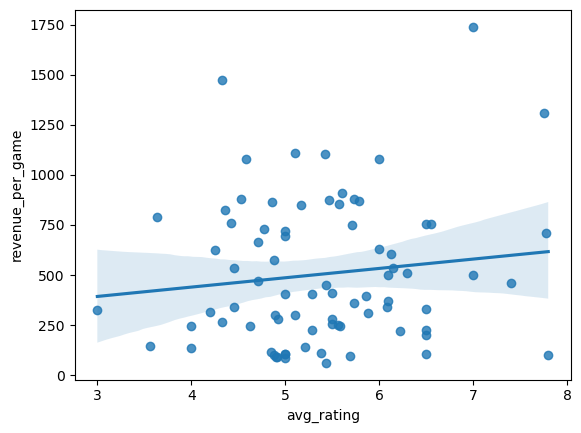

In [7]:
sns.regplot(
    data=df,
    x='avg_rating',
    y='revenue_per_game'
)
plt.show()

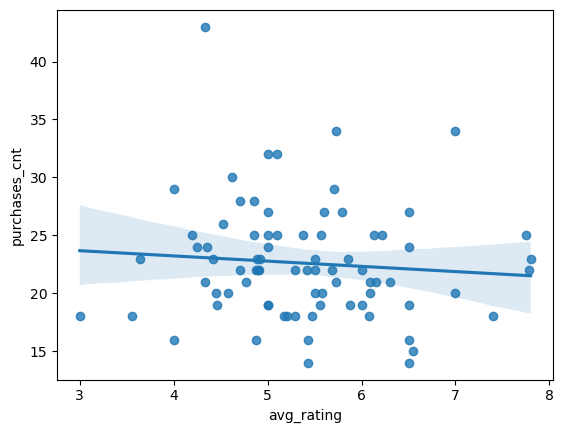

In [9]:
sns.regplot(
    data=df,
    x='avg_rating',
    y='purchases_cnt'
)
plt.show()

#### Вывод по 3.1:
В целом отмечается зависимость, что чем выше рейтинг игры, тем выше доход от её продаж. Однако не всегда можно сказать, что высокий рейтинг игры означает, что количество покупок игры будет так же высоким.

#### 3.2 Поведение пользователей (LTV-подобный анализ)

Для каждого пользователя:

количество покупок

суммарные траты

средний рейтинг, который он ставит

Задания:

разбить пользователей на группы по тратам (квантили)

сравнить средний рейтинг между группами

построить boxplot

In [48]:
df = pd.read_sql('''
with user_metrics as (select
        u.user_id,
        SUM(p.price_paid) total_spent,
        AVG(r.rating) avg_rating
    from users u
    join purchases p
        on u.user_id = p.user_id
    left join reviews r
         on u.user_id = r.user_id
    group by u.user_id
)
select
    user_id,
    total_spent,
    avg_rating,
    ntile(4) over (order by total_spent) as spend_quantile
from
    user_metrics
order by user_id
    ''',sql)
df

,user_id,total_spent,avg_rating,spend_quantile
0,1,675.68,4.000000,3
1,2,1014.75,4.600000,3
2,3,515.82,4.500000,2
3,4,641.73,6.333333,2
4,5,298.87,1.000000,1
...,...,...,...,...
194,195,427.82,5.500000,1
195,196,307.76,5.250000,1
196,197,629.70,5.200000,2
197,198,530.76,8.333333,2


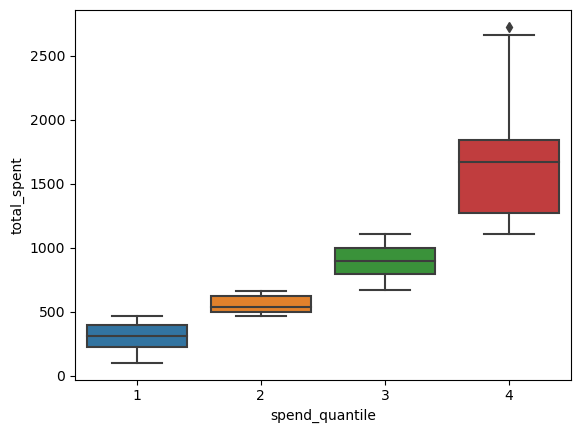

In [52]:
sns.boxplot(data=df, x='spend_quantile', y='total_spent')

plt.show()

#### 3.3 Временная аналитика

По месяцам покупки:

количество покупок

суммарная выручка

средняя цена покупки

Задания:

построить линейные графики

проверить, растёт ли средний чек со временем

сделать краткий вывод (2–3 предложения)

In [5]:
df = pd.read_sql(
'''
select
    strftime('%Y-%m', purchase_date) as purchase_month,
    count(purchase_id) as purchases_cnt,
    sum(price_paid) as total_revenue,
    avg(price_paid) as avg_purchase_price
from purchases
group by purchase_month
order by purchase_month
''',
sql)

df

,purchase_month,purchases_cnt,total_revenue,avg_purchase_price
0,2025-01,144,3175.56,22.052500
1,2025-02,138,2839.62,20.576957
2,2025-03,154,3504.49,23.208543
3,2025-04,163,3734.41,23.486855
4,2025-05,165,4010.35,24.305152
5,2025-06,140,2850.61,20.507986
6,2025-07,196,4108.05,21.066923
7,2025-08,151,3541.50,23.610000
8,2025-09,148,3232.54,22.140685
9,2025-10,164,3391.37,20.805951


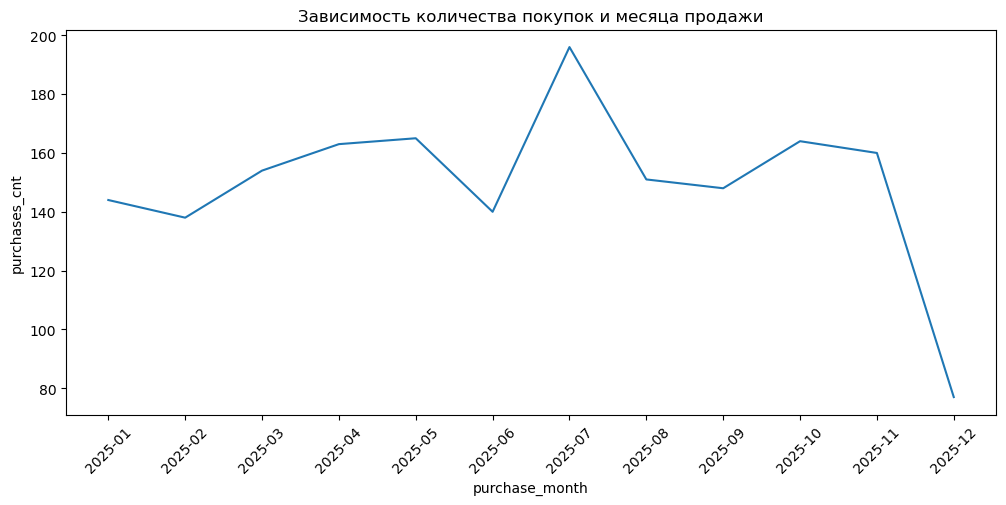

In [26]:
plt.figure(figsize=(12, 5))

sns.lineplot(data=df, x='purchase_month', y='purchases_cnt')

plt.xticks(rotation=45)
plt.title('Зависимость количества покупок и месяца продажи')
plt.show()

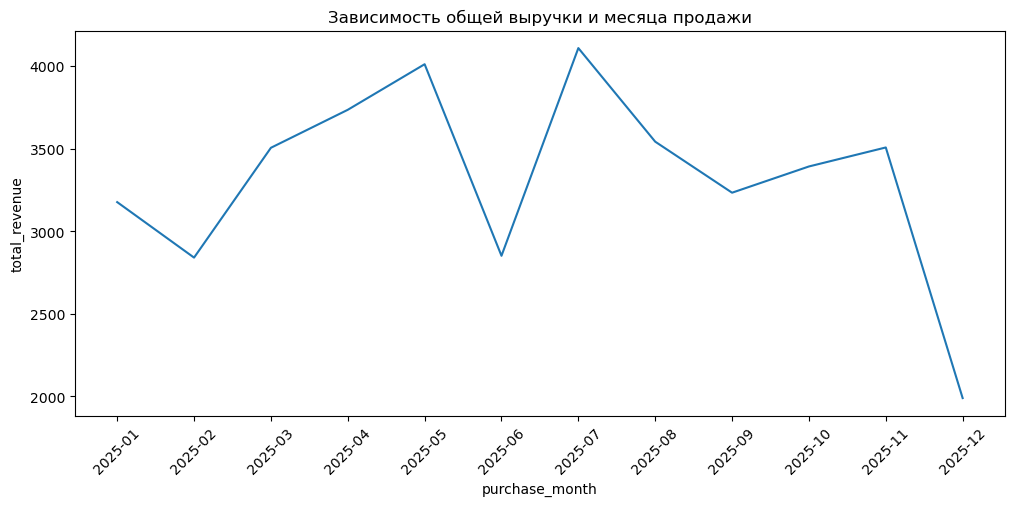

In [27]:
plt.figure(figsize=(12, 5))

sns.lineplot(data=df, x='purchase_month', y='total_revenue')

plt.xticks(rotation=45)
plt.title('Зависимость общей выручки и месяца продажи')
plt.show()

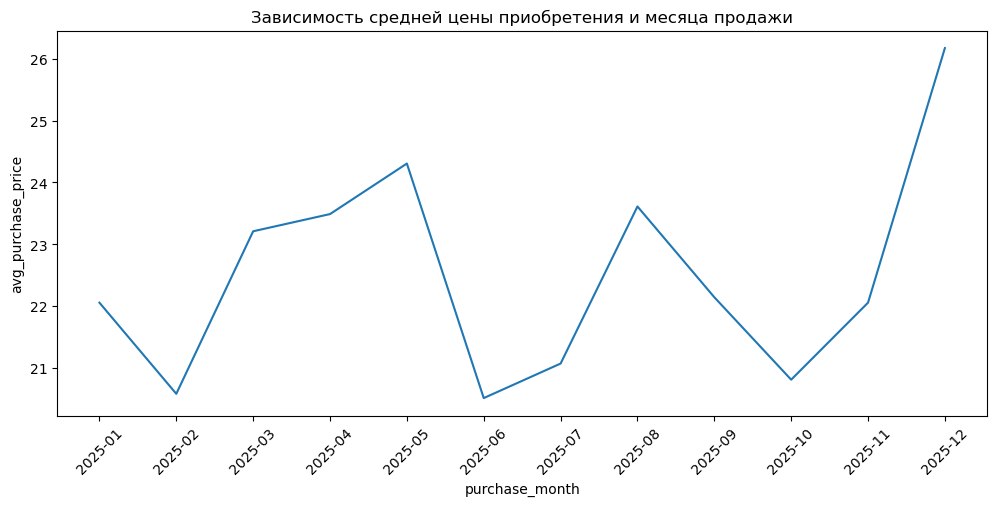

In [28]:
plt.figure(figsize=(12, 5))

sns.lineplot(data=df, x='purchase_month', y='avg_purchase_price')

plt.xticks(rotation=45)
plt.title('Зависимость средней цены приобретения и месяца продажи')
plt.show()

#### Выводы:
Количество покупок имеет сезонность, с максимумом летом и спадом в конце года. Выручка масштабируется в первую очередь за счёт количества транзакций, а не за счёт роста среднего чека. Средняя цена покупки не является основным фактором выручки и ведёт себя независимо от объёма продаж.

#### 3.4 Retention / Engagement (усложнённое)

Для каждого пользователя:

дата первой покупки

количество уникальных дней с покупками

наличие отзывов (0/1)

Задания:

проверить, чаще ли пишут отзывы пользователи с повторными покупками

оформить вывод в виде таблицы + графика

In [35]:
df = pd.read_sql(
'''
SELECT
    u.user_id,
    u.username,
    min(p.purchase_date) as first_purchase_date,
    count(distinct date(p.purchase_date)) as purchase_days_cnt,
    case
        when count(r.review_id) > 0 then 1
        else 0
    end as has_reviews
from users u
join purchases p
    on u.user_id = p.user_id
left join reviews r
    on u.user_id = r.user_id
group by u.user_id
''',
sql
)

df

,user_id,username,first_purchase_date,purchase_days_cnt,has_reviews
0,1,user_0002,2025-01-07 00:00:00,16,1
1,2,user_0003,2025-02-01 00:00:00,5,1
2,3,user_0004,2025-01-02 00:00:00,9,1
3,4,user_0005,2025-01-21 00:00:00,9,1
4,5,user_0006,2025-01-06 00:00:00,13,1
...,...,...,...,...,...
194,195,user_0196,2025-03-20 00:00:00,9,1
195,196,user_0197,2025-04-21 00:00:00,6,1
196,197,user_0198,2025-04-12 00:00:00,6,1
197,198,user_0199,2025-01-22 00:00:00,8,1


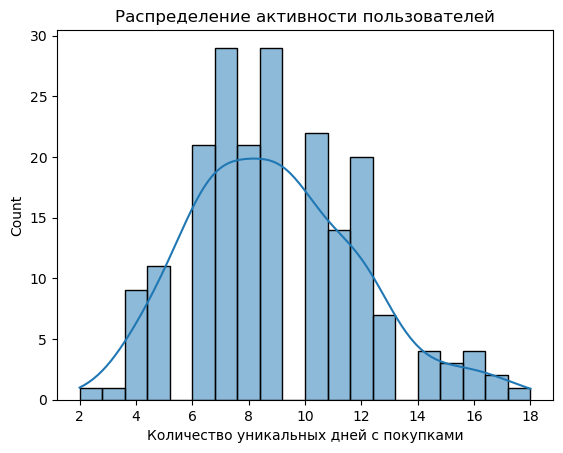

In [36]:
sns.histplot(df['purchase_days_cnt'], bins=20, kde=True)

plt.xlabel('Количество уникальных дней с покупками')
plt.title('Распределение активности пользователей')
plt.show()

Пользовательская активность в целом умеренная, с небольшой, но важной группой наибольшего вовлечения (14-18 дней с покупками)

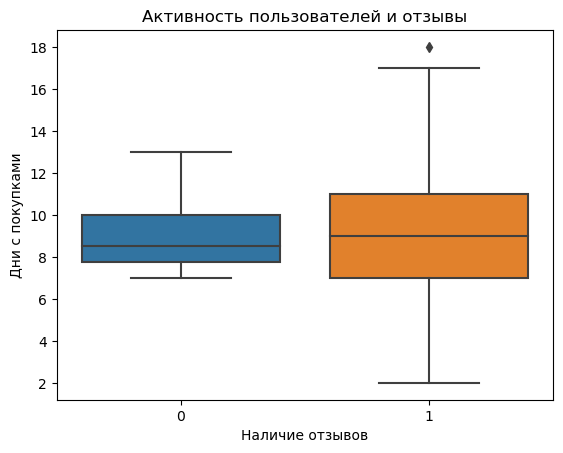

In [42]:
sns.boxplot(data=df, x='has_reviews', y='purchase_days_cnt')

plt.xlabel('Наличие отзывов')
plt.ylabel('Дни с покупками')
plt.title('Активность пользователей и отзывы')
plt.show()

Пользователи, оставляющие отзывы, в среднем активнее покупают игры

In [45]:
df['first_purchase_date'] = pd.to_datetime(df['first_purchase_date'])

df['first_month'] = df['first_purchase_date'].dt.to_period('M').astype(str)

df

,user_id,username,first_purchase_date,purchase_days_cnt,has_reviews,first_month
0,1,user_0002,2025-01-07,16,1,2025-01
1,2,user_0003,2025-02-01,5,1,2025-02
2,3,user_0004,2025-01-02,9,1,2025-01
3,4,user_0005,2025-01-21,9,1,2025-01
4,5,user_0006,2025-01-06,13,1,2025-01
...,...,...,...,...,...,...
194,195,user_0196,2025-03-20,9,1,2025-03
195,196,user_0197,2025-04-21,6,1,2025-04
196,197,user_0198,2025-04-12,6,1,2025-04
197,198,user_0199,2025-01-22,8,1,2025-01


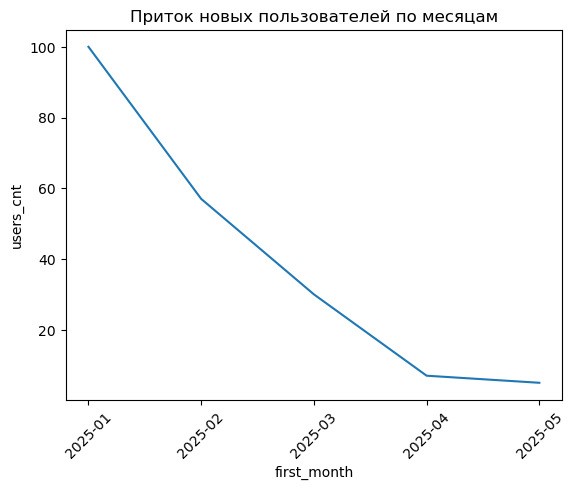

In [46]:
cohorts = (
    df.groupby('first_month')
      .agg(users_cnt=('user_id', 'count'))
      .reset_index()
)

sns.lineplot(data=cohorts, x='first_month', y='users_cnt')
plt.xticks(rotation=45)
plt.title('Приток новых пользователей по месяцам')
plt.show()

Приток новых пользователей снижается со временем

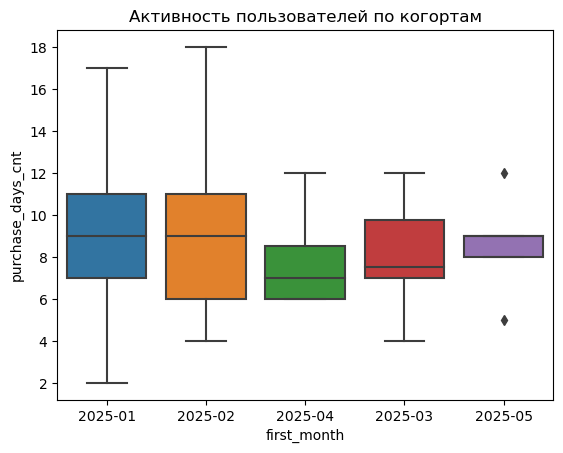

In [49]:
sns.boxplot(data=df, x='first_month', y='purchase_days_cnt')

plt.title('Активность пользователей по когортам')
plt.show()

Ранние когорты демонстрируют более высокую вовлечённость, чем поздние